In [1]:
# %load big_volume.py
import os
import sys
#from load_path import *
import numpy as np
#import pandas as pd
import datetime
#from numpy._distributor_init import NUMPY_MKL
import re
from datetime import datetime
import itertools
from package_path_define.path_define import *
from package_readdata.read_data import * # load read data function
import matplotlib.pyplot as plt




the path define is in G:\stock\code\package_path_define


In [61]:
def get_data(stk_num,path_in,date1,date2):
    if stk_num[:2]=='60':
        market='shanghai'
    elif stk_num[:2]=='00':
        market='shenzhen'
    else:
        print 'the stock number input is wrong'
        os._exit()
    stock_path1='\\'.join([path_in,market,stk_num])
    stk_list=os.listdir(stock_path1)
    num_in=find_stocks_in_date_range(stock_path1,date1,date2)
    price_all=[]
    vol_all=[]
    if len(num_in)>0:
        for fi1 in num_in:
            try:
                data_file='\\'.join([path_in,market,stk_num,stk_list[fi1]])
                #print data_file
                df1=read_vol_price_data(data_file)
                total1=df1.volume.values.tolist() ## pandas value to list
                price1=df1.price.values.tolist()
                vol=[a/b for a, b in zip(total1,price1)]
                price_all.append(price1)
                vol_all.append(vol)
            except:
                #print 'fuck'
                pass
    else:
        print 'no data'
    return price_all,vol_all

In [63]:
stock_index_file="shanghai_shenzhen_data_from_2013"
stock_path='\\'.join([main_path_data,stock_index_file,market])
sto2=os.listdir(stock_path)
# define: date and market
date1=datetime(2015,1,11).strftime('%Y-%m-%d')
date2=datetime(2015,1,15).strftime('%Y-%m-%d')

stk_num="000917"
price_all,vol_all=get_data(stk_num,path_price_volume,date1,date2)
print path_price_volume
#print price_all[1]
print len(price_all)
print type(price_all)
price_all1 = list(itertools.chain(*price_all))
vol_all1 = list(itertools.chain(*vol_all))
print len(price_all1)
np.max(vol_all1)

G:\\stock\\data\\daily_price_volume
5
<type 'list'>
10795


552820.0

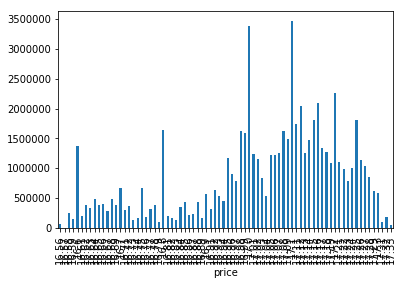

In [64]:
df1=pd.DataFrame({'price':price_all1,'volume':vol_all1})
df2=df1.groupby(['price'])['volume'].sum()
#print df2
df2.hist(bins=10)
df2.plot(kind='bar')
plt.show()

In [40]:
print df1

      price        volume
0     14.43   32300.00000
1     14.43       0.00000
2     14.44   23200.00000
3     14.44   16600.00000
4     14.45    1200.00000
5     14.45    2000.00000
6     14.45    5000.00000
7     14.45    2000.00000
8     14.45    2000.00000
9     14.45     900.00000
10    14.44     100.00000
11    14.45     500.00000
12    14.44    6300.00000
13    14.44    3400.00000
14    14.44     700.00000
15    14.44    2000.00000
16    14.44    3900.00000
17    14.43    4100.00000
18    14.43     500.00000
19    14.43    1400.00000
20    14.43    3400.00000
21    14.44    1300.00000
22    14.43    2400.00000
23    14.43    3639.98614
24    14.43   10200.00000
25    14.43    7300.00000
26    14.43    2900.00000
27    14.43    4059.94456
28    14.42    2000.00000
29    14.43    8500.00000
...     ...           ...
6012  13.93    1500.00000
6013  13.93     800.00000
6014  13.94    2000.00000
6015  13.94    3000.00000
6016  13.93    8700.00000
6017  13.92   40700.00000
6018  13.94 

In [54]:
market='shenzhen'
year1=2015
year2=2016

path1='\\'.join([path_fuquan,market])
sto1=os.listdir(path1)
sto2='000917'
#sto2=sto1[10]
#print sto1
stock_full_path='\\'.join([path1,sto2])
print stock_full_path
files=os.listdir(stock_full_path)
file_num_in=find_stocks_in_date_range_fuquan(stock_full_path,year1,year2) #--- find the stock files in the year range we give


def data_get(stock_full_path,files,file_num_in):
    df_m1 = pd.DataFrame() ## create a blank dataframe
    for num_in in file_num_in:
        file_in='\\'.join([stock_full_path,files[num_in]])
        #print file_in
        df1=read_vol_price_data_fuquan(file_in)
        df_m1=df_m1.append(df1,ignore_index=False)
        #print df1.head()
        #print len(df1)
    date1=df_m1.date.values
    years=[]
    months=[]
    for da in date1:
        year=da[0:4]
        month=da[5:7]
        years.append(int(year))
        months.append(int(month))
    df_m1['year']=years
    df_m1['month']=months
    return df_m1
data_df1=data_get(stock_full_path,files,file_num_in)

G:\\stock\\data\\fuquan\shenzhen\000917


In [59]:
#print data_df1
df3=data_df1[(data_df1.date>=date1)&(data_df1.date<=date2)]
print df3

          date     open     high    close      low      volume  trade_amount  \
53  2016-01-11  148.749  151.097  139.119  139.119  68713704.0  1.268613e+09   
52  2016-01-12  139.745  143.660  140.293  136.144  53668972.0  9.650943e+08   
51  2016-01-13  141.781  142.955  131.603  127.611  58006984.0  1.024517e+09   
50  2016-01-14  126.515  140.450  140.293  126.123  67750720.0  1.159414e+09   
49  2016-01-15  139.510  142.485  134.735  132.699  66384612.0  1.173440e+09   
48  2016-01-18  132.308  143.190  139.667  132.073  58675468.0  1.039557e+09   
47  2016-01-19  138.806  145.226  144.208  137.632  69606120.0  1.261229e+09   
46  2016-01-20  143.190  150.001  145.774  137.710  96072784.0  1.753398e+09   
45  2016-01-21  141.076  144.756  133.717  133.169  66852452.0  1.201241e+09   
44  2016-01-22  136.614  139.824  137.005  131.916  47717340.0  8.283644e+08   
43  2016-01-25  137.945  141.233  139.745  137.083  40219100.0  7.147923e+08   
42  2016-01-26  137.240  138.180  125.81

In [ ]:
def data_get(stock_full_path,files,file_num_in):
    df_m1 = pd.DataFrame() ## create a blank dataframe
    for num_in in file_num_in:
        file_in='\\'.join([stock_full_path,files[num_in]])
        #print file_in
        df1=read_vol_price_data_fuquan(file_in)
        df_m1=df_m1.append(df1,ignore_index=False)
        #print df1.head()
        #print len(df1)
    date1=df_m1.date.values
    years=[]
    months=[]
    for da in date1:
        year=da[0:4]
        month=da[5:7]
        years.append(int(year))
        months.append(int(month))
    df_m1['year']=years
    df_m1['month']=months
    return df_m1
#print main_path_data

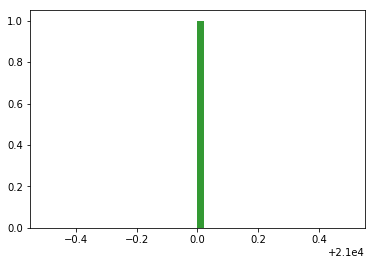

In [31]:
#j2 = [i for i in vol_all1 if i <30000]

fig = plt.figure()
ax = fig.add_subplot(111)

numBins = 50
ax.hist(df2.iloc[1],numBins,color='green',alpha=0.8)
plt.show()


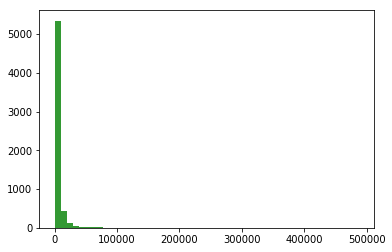

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111)
numBins = 50
ax.hist(vol_all1,numBins,color='green',alpha=0.8)
plt.show()

In [18]:
ax = fig.add_subplot(111)

numBins = 50
ax.hist(vol_all1,numBins,color='green',alpha=0.8)
plt.show()

In [ ]:
#stk_num="000001"
for i in sto2[0:2]:
    stk_num=i[0:6]
    print i
    stock_path1='\\'.join([path_price_volume,market,stk_num])
    stk_list=os.listdir(stock_path1)
    num_in=find_stocks_in_date_range(stock_path1,date1,date2)
    if len(num_in)>0:
        for fi1 in num_in:
            try:
                data_file="g:/stock/data/daily_price_volume/shenzhen/%s/%s" % (stk_num,stk_list[fi1])
                #print data_file
                df1=read_vol_price_data(data_file)
                total1=df1.volume.values.tolist() ## pandas value to list
                price1=df1.price.values.tolist()
                vol=[a/b for a, b in zip(total1,price1)]
                print vol[0:4]
            except:
                #print 'fuck'
                pass